<a href="https://colab.research.google.com/github/riyagpt0251/SVR-model-for-settlement-predicton/blob/main/SVR_model_for_settlement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

load the dataset

In [2]:
data = {
    "Cohesion_kPa": [25, 30, 35, 40, 45, 50, 55],
    "Permeability_cm_per_s": [0.0001, 0.0005, 0.0002, 0.0003, 0.0004, 0.0001, 0.0006],
    "Water_Content_percent": [20, 25, 22, 30, 35, 28, 26],
    "Loading_kN_per_m2": [200, 300, 250, 400, 450, 350, 320],
    "Depth_m": [5, 8, 6, 10, 12, 9, 7],
    "Settlement_mm": [15, 25, 18, 35, 40, 30, 28]
}
df = pd.DataFrame(data)

data preprocessing

In [3]:
X = df.drop("Settlement_mm", axis=1)  # Features
y = df["Settlement_mm"]

scaler feature

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Build and train the model

In [6]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

make the prediction

In [7]:
y_pred = svr.predict(X_test)


evaluate the model

In [8]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.17
Root Mean Squared Error (RMSE): 2.93
R² Score: 0.66


visualization

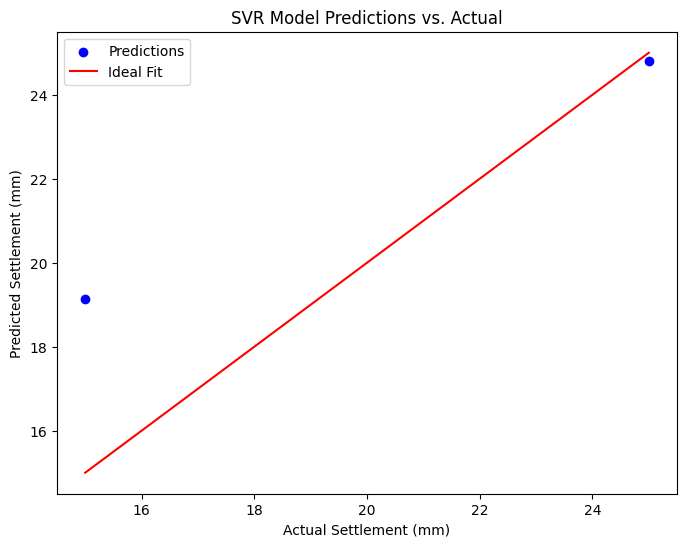

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
plt.xlabel("Actual Settlement (mm)")
plt.ylabel("Predicted Settlement (mm)")
plt.title("SVR Model Predictions vs. Actual")
plt.legend()
plt.show()